In [2]:
from pyfaidx import Fasta
import pandas as pd
import re

fasta_send = "../../data/CTX/CTX.fasta"
fasta_xml = "../../data/CTX_xml/pharmaFam/pharmaFam.fasta"
csv_xml = "../../data/CTX_xml/pharmaFam/pharmaFam.csv"
df_data = "../../out/CTX_pharmaFam/data_analysis.csv"

send = Fasta(fasta_send, read_long_names=True)
xml = Fasta(fasta_xml)
df_xml = pd.read_csv(csv_xml)

In [3]:
no_synthetic_constructs = df_xml.loc[df_xml["organismLatin"] != "synthetic construct", "id"].values
synthetic_constructs = df_xml.loc[df_xml["organismLatin"] == "synthetic construct", "id"].values

In [4]:
send_uids = set()
xml_uids = set()
for header, seq in send.items():
    uid = re.match(r".*\[(\w{6})\]", header).groups()[0]
    send_uids.add(uid)

for uid, seq in xml.items():
    xml_uids.add(uid)

print(len(send_uids), len(xml_uids))

196 241


<AxesSubplot: >

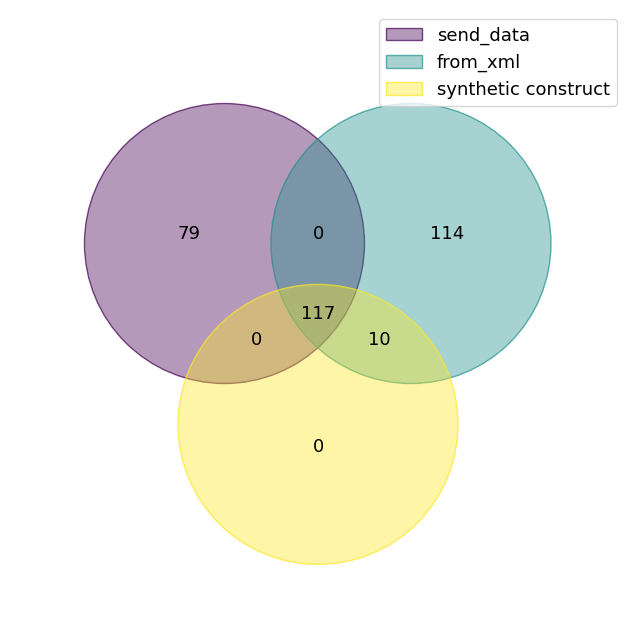

In [5]:
from venn import venn

dict_set = {"send_data": send_uids, "from_xml": xml_uids, "synthetic construct": set(no_synthetic_constructs)}
venn(dict_set)

In [64]:
send_exclusively = send_uids-xml_uids
intersection = send_uids.intersection(xml_uids)
xml_exclusively = xml_uids-send_uids
union = send_uids.union(xml_uids)

In [65]:
df = pd.DataFrame({"conotoxin_uid": sorted(list(union))})
df.loc[df["conotoxin_uid"].isin(send_exclusively), "dataset_present"] = "send"
df.loc[df["conotoxin_uid"].isin(intersection), "dataset_present"] = "both"
df.loc[df["conotoxin_uid"].isin(xml_exclusively), "dataset_present"] = "xml"
df.loc[df["conotoxin_uid"].isin(synthetic_constructs), "synthetic_constructs"] = "yes"
df.to_csv(df_data, index=False)